# Multilpe Linear Regression Session

Como tenemos multiples predictores, tendremos un calculo más refinado de los mismos y, por lo tanto, podemos llegar a tener un modelo más refinado. En base al dataset de la venta de periodicos, tendrúamos las siguientes variables predictoras:
- Ventas vs TV
- Ventas vs Newspaper
- Ventas vs Radio
- Ventas vs TV+Newspaper
- ventas vs TV+Radio
- Ventas vs Newspaper+Radio
- Ventas vs VS+Nwespaper+Radio 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


El conseejo antes de empezar con un modelo lineal con todas variables predictoras e ir quedandonos con aquellas que tienen un p-valor bajo. 

In [4]:
data_pub = pd.read_csv('../data/ads/advertising.csv')

In [5]:
data_pub.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
correlation_matrix = data_pub.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales,RSE
TV,1.000000,0.054809,0.056648,0.782224,NaN
Radio,0.054809,1.000000,0.354104,0.576223,NaN
Newspaper,0.056648,0.354104,1.000000,0.228299,NaN
Sales,0.782224,0.576223,0.228299,1.000000,NaN
RSE,NaN,NaN,NaN,NaN,NaN


Vamos a empezar con añadir el newspaper al modelo inicial de Sales vs TV: 

In [11]:
lm = smf.ols(formula="Sales~TV", data= data_pub).fit()

In [12]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [13]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data= data_pub).fit()

In [14]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [15]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [17]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [18]:
lm.rsquared

0.6118750508500712

In [19]:
lm2.rsquared

0.645835493829327

In [21]:
sales_pred = lm2.predict (data_pub [["TV", 'Newspaper']])

In [22]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [23]:
results_lm2 = data_pub

In [24]:
SSE = sum((results_lm2['Sales']- sales_pred)**2)

In [27]:
RSE= np.sqrt(SSE/(len(results_lm2)-2-1))

In [28]:
RSE

3.120719860252885

In [29]:
sales_m = np.mean(data_pub['Sales'])

In [30]:
error_prom = RSE/sales_m

In [31]:
error_prom

0.2225508903728212

In [33]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.95e-45
Time:                        22:50:50   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como conclusion, añadir el periodico, no nos ha aportado nada. Ahora vamos a aportar la Radio.

In [34]:
lm3 = smf.ols(formula="Sales~TV+Radio", data= data_pub).fit()

In [35]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [37]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.83e-98
Time:                        22:52:55   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sales_pred = lm3.predict (data_pub [["TV", 'Radio']])

In [40]:
SSE_3 = sum((results_lm2['Sales']- sales_pred)**2)

In [42]:
RSE_3= np.sqrt(SSE_3/(len(results_lm2)-2-1))

In [43]:
error_prom = RSE_3/sales_m

In [44]:
error_prom

0.1199045043685506

Y si añadimos los 3? Que ocurrira? Debería ser el mejor? 

In [45]:
lm4 = lm3 = smf.ols(formula="Sales~TV+Radio+Newspaper", data= data_pub).fit()

In [46]:
lm4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [47]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        22:56:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El p-valor del periodico es muy alto y, por lo tanto, no aporta nada al modelo. Y por tanto se puede aceptar la hipotesis nula para este parámetro.

## Multicolinealidad

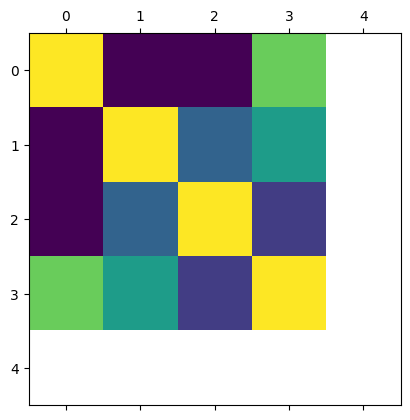

In [50]:
plt.matshow(correlation_matrix)

correlation_matrix

Al mirar otra vez la matriz de la correlación, se puede observar que el periodico esta relacionado con la radio, lo que aumenta la variablidad del coeficiente estimado. Cuando encontramos esta colinealidad, tenemos que borrar una de las vairables. Para ello, deberemos hacer una prueba de varianza:

$$VIF = 1/(1-R^2)$$

Ahora lo qye vamos a calcular los VIFs para las tres variables: 

Si VIF = 1 las variables no estan correlacionadas. 
Si VIF < 5 las variables tienen una correlación moderada y se pueden mantener
Si VIF > 5 las variablees  estan altamente correlacionadas y deben desaparecer del modelo

In [54]:
lm_newspaper = smf.ols(formula='Newspaper~TV+Radio', data=data_pub).fit()
VIF_n = 1/(1-lm_newspaper.rsquared)
VIF_n

1.145187378723929

In [55]:
lm_radio = smf.ols(formula='Radio~TV+Newspaper', data=data_pub).fit()
VIF_r = 1/(1-lm_radio.rsquared)
VIF_r

1.1449519171055356

In [56]:
lm_tv = smf.ols(formula='TV~Radio+Newspaper', data=data_pub).fit()
VIF_tv = 1/(1-lm_tv.rsquared)
VIF_tv

1.00461078493965

En vista de los resultados, nos quedamos con el modelo de Sales ~ TV + Radio ya que es la que mejor conjunto de VIF tienen.

In [57]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        22:12:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""